In [97]:
!pip3 install --upgrade pip
!pip3 install sklearn
!pip3 install numpy
!pip3 install matplotlib

In [98]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import decomposition, linear_model, metrics

In [99]:
path_to_train = './MNIST_training_set.npy'
path_to_test = './MNIST_test_set.npy'

d_train = np.load(path_to_train, allow_pickle=True)
d_test = np.load(path_to_test, allow_pickle=True)
X_train = d_train.item().get('features')
Y_train = d_train.item().get('labels')

print(X_train.shape)
print(Y_train.shape)

X_test = d_test.item().get('features')
Y_test = d_test.item().get('labels')

print(X_test.shape)
print(Y_test.shape)

(2000, 256)
(2000,)
(500, 256)
(500,)


In [100]:
pca = decomposition.PCA()
pca.fit(X_train)

PCA()

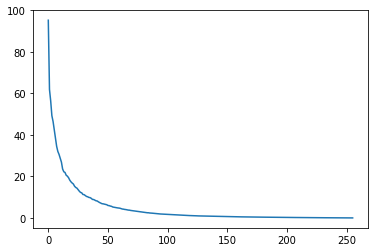

In [101]:
fig, ax = plt.subplots()
ax.plot(pca.singular_values_)

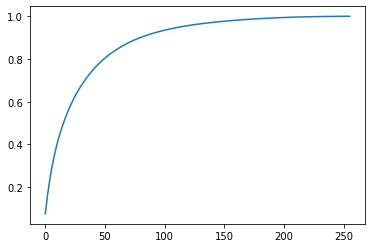

In [102]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.singular_values_) / np.cumsum(pca.singular_values_)[-1])

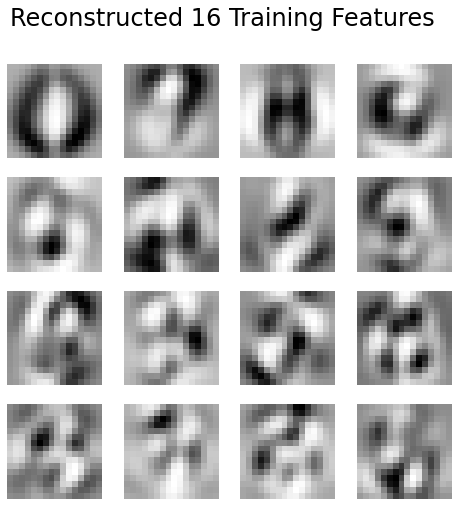

In [103]:
def plot_digits(XX, N, title):
    """Small helper function to plot N**2 digits."""
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[(N)*i+j,:].reshape((16, 16)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(pca.components_, 4, "Reconstructed 16 Training Features" )

In [104]:
def approximate_at_percent(percent):
    pca = decomposition.PCA(percent ** 2)
    pca.fit(X_train)
    components = pca.components_
    return components.shape[0]


print(approximate_at_percent(0.6))
print(approximate_at_percent(0.8))
print(approximate_at_percent(0.9))

3
7
14


In [105]:
# nums = []
# for i in np.arange(0.01, 1, 0.01):
#     approx = approximate_at_percent(i)
#     nums.append(approx)

In [106]:
# fig, ax = plt.subplots()
# ax.plot(nums, np.arange(0.01, 1, 0.01))

# fig.savefig('pca_plot.png')

In [107]:
def extract_feature_for_given_ints(ints, x_data, y_data):
    X = []
    Y = []
    for i, value in enumerate(y_data):
        if value in ints:
            X.append(x_data[i])
            Y.append(value)
    return X, Y

In [108]:
ints = {1, 8}
X_train_18, Y_train_18 = extract_feature_for_given_ints(ints, X_train, Y_train)
X_test_18, Y_test_18 = extract_feature_for_given_ints(ints, X_test, Y_test)

In [109]:
def map_18_to_neg_1_pos_1(labels):
    new_labels = []
    for value in labels:
        if value == 8: 
            new_labels.append(1)
        else: 
            new_labels.append(-1)
    return new_labels

Y_train_18 = map_18_to_neg_1_pos_1(Y_train_18)
Y_test_18 = map_18_to_neg_1_pos_1(Y_test_18)

In [110]:
pca_first_16 = decomposition.PCA(n_components=16)
pca_first_16.fit(X_train)
A_train = pca_first_16.transform(X_train_18)

In [116]:
clf = linear_model.Ridge(0.1)
clf.fit(A_train, Y_train_18)
pred = clf.predict(A_train)
#Get MSE
metrics.mean_squared_error(pred, Y_train_18)

455


In [117]:
min_value = 0
min_alpha = 0
for i in np.arange(0.1, 10, 0.1):
    clf = linear_model.Ridge(i)
    clf.fit(A_train, Y_train_18)
    pred = clf.predict(A_train)
    #Get MSE
    mse = metrics.mean_squared_error(pred, Y_train_18)
    if mse < min_value: 
        min_value = mse
        min_alpha = i

0.07459639545351247

In [ ]:
print(min_value)
print(min_alpha)